In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping... " + city)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taburi
City not found. Skipping... taburi
Processing Record 2 of Set 1 | mutsamudu
City not found. Skipping... mutsamudu
Processing Record 3 of Set 1 | humberto de campos
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | kloulklubed
Processing Record 8 of Set 1 | ambodifototra
City not found. Skipping... ambodifototra
Processing Record 9 of Set 1 | lensk
Processing Record 10 of Set 1 | betera
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | kropotkin
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | sorvag
City not found. Skipping... sorvag
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | shingu
Processing Record 

Processing Record 30 of Set 4 | merauke
Processing Record 31 of Set 4 | mopipi
Processing Record 32 of Set 4 | kidal
Processing Record 33 of Set 4 | brae
Processing Record 34 of Set 4 | balakhta
Processing Record 35 of Set 4 | mogadishu
Processing Record 36 of Set 4 | pindobacu
Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | kargasok
Processing Record 40 of Set 4 | comodoro rivadavia
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | the valley
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | berdigestyakh
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | bonwapitse
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | yanan
City not found. Skipping... yanan
Processing Record 50 of Set 4 | mehamn
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | vestmannaeyjar
Pro

Processing Record 13 of Set 8 | vila franca do campo
Processing Record 14 of Set 8 | yangmei
Processing Record 15 of Set 8 | bolshoye sorokino
City not found. Skipping... bolshoye sorokino
Processing Record 16 of Set 8 | puerto leguizamo
Processing Record 17 of Set 8 | nhulunbuy
Processing Record 18 of Set 8 | biak
Processing Record 19 of Set 8 | san cristobal
Processing Record 20 of Set 8 | lebedinyy
Processing Record 21 of Set 8 | ancud
Processing Record 22 of Set 8 | dibulla
Processing Record 23 of Set 8 | ossora
Processing Record 24 of Set 8 | ornskoldsvik
Processing Record 25 of Set 8 | aksu
Processing Record 26 of Set 8 | ankazobe
Processing Record 27 of Set 8 | batticaloa
Processing Record 28 of Set 8 | san patricio
Processing Record 29 of Set 8 | livingstone
Processing Record 30 of Set 8 | ketchikan
Processing Record 31 of Set 8 | polunochnoye
Processing Record 32 of Set 8 | merrill
Processing Record 33 of Set 8 | izhma
Processing Record 34 of Set 8 | cazaje
City not found. Ski

Processing Record 46 of Set 11 | dukat
Processing Record 47 of Set 11 | ngukurr
City not found. Skipping... ngukurr
Processing Record 48 of Set 11 | domna
Processing Record 49 of Set 11 | warqla
City not found. Skipping... warqla
Processing Record 50 of Set 11 | port-gentil
Processing Record 1 of Set 12 | sao joao da barra
Processing Record 2 of Set 12 | marcona
City not found. Skipping... marcona
Processing Record 3 of Set 12 | umm lajj
Processing Record 4 of Set 12 | teguldet
Processing Record 5 of Set 12 | alice springs
Processing Record 6 of Set 12 | karkaralinsk
City not found. Skipping... karkaralinsk
Processing Record 7 of Set 12 | umm kaddadah
Processing Record 8 of Set 12 | leshukonskoye
Processing Record 9 of Set 12 | milingimbi
City not found. Skipping... milingimbi
Processing Record 10 of Set 12 | narsaq
Processing Record 11 of Set 12 | hailar
Processing Record 12 of Set 12 | anacortes
Processing Record 13 of Set 12 | pangoa
Processing Record 14 of Set 12 | murud
Processing

In [8]:
len(city_data)

560

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Humberto De Campos,-2.5983,-43.4611,74.34,92,21,3.98,BR,2021-08-06 05:22:09
1,Cidreira,-30.1811,-50.2056,60.35,95,100,15.57,BR,2021-08-06 05:22:09
2,Kavieng,-2.5744,150.7967,84.24,70,46,14.16,PG,2021-08-06 05:22:10
3,Hilo,19.7297,-155.0900,75.25,91,62,1.99,US,2021-08-06 05:19:30
4,Kloulklubed,7.0419,134.2556,82.90,67,100,4.59,PW,2021-08-06 05:22:10
5,Lensk,60.7253,114.9278,76.68,44,100,8.01,RU,2021-08-06 05:22:11
6,Betera,39.5833,-0.4500,73.85,88,0,0.00,ES,2021-08-06 05:22:11
7,Severo-Kurilsk,50.6789,156.1250,56.44,63,5,14.38,RU,2021-08-06 05:22:12
8,Lebu,-37.6167,-73.6500,50.11,89,100,7.76,CL,2021-08-06 05:22:12
9,Kropotkin,45.4375,40.5756,86.38,31,0,16.28,RU,2021-08-06 05:22:13


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Humberto De Campos,BR,2021-08-06 05:22:09,-2.5983,-43.4611,74.34,92,21,3.98
1,Cidreira,BR,2021-08-06 05:22:09,-30.1811,-50.2056,60.35,95,100,15.57
2,Kavieng,PG,2021-08-06 05:22:10,-2.5744,150.7967,84.24,70,46,14.16
3,Hilo,US,2021-08-06 05:19:30,19.7297,-155.0900,75.25,91,62,1.99
4,Kloulklubed,PW,2021-08-06 05:22:10,7.0419,134.2556,82.90,67,100,4.59
5,Lensk,RU,2021-08-06 05:22:11,60.7253,114.9278,76.68,44,100,8.01
6,Betera,ES,2021-08-06 05:22:11,39.5833,-0.4500,73.85,88,0,0.00
7,Severo-Kurilsk,RU,2021-08-06 05:22:12,50.6789,156.1250,56.44,63,5,14.38
8,Lebu,CL,2021-08-06 05:22:12,-37.6167,-73.6500,50.11,89,100,7.76
9,Kropotkin,RU,2021-08-06 05:22:13,45.4375,40.5756,86.38,31,0,16.28


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

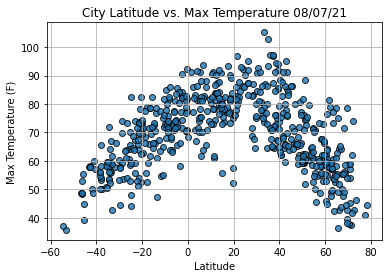

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

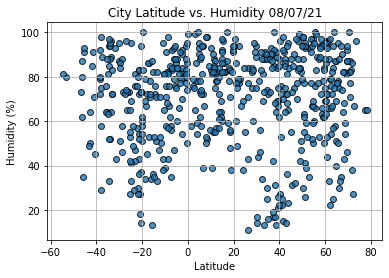

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

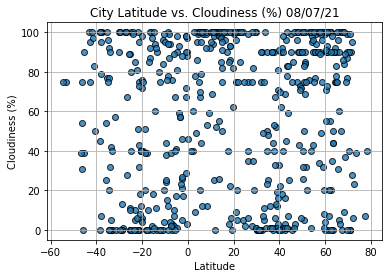

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

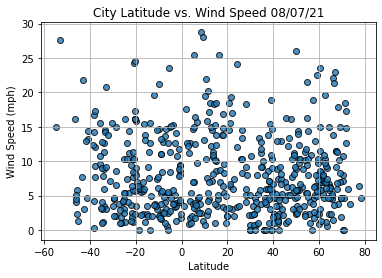

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()